In [303]:
%load_ext autoreload

%autoreload

import numpy as np
import visualization.array_rendering as ar
import visualization.creature_rendering as cr
import asset_generation.land_creation as lc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


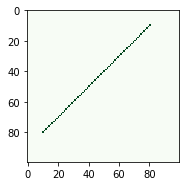

In [304]:
test_line = [80.0,10.0,10.0,80.0]
empty_template = np.zeros((100,100))
creature_id = 1

cr.detect_occluded_squares(empty_template, test_line, creature_id)

ar.render_array(empty_template)

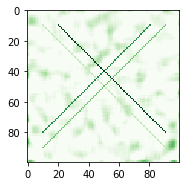

In [305]:

empty_template = lc.create_template(100, 100)
empty_template =  lc.add_smoothing_to_template(empty_template)
land, water = lc.generate_land_and_water_from_template(empty_template, 0.5)
entire_surface = lc.entire_surface(land, water)


num_segments = 4
creature_id = 0

creature = np.zeros(shape=(num_segments + 1, 5))
creature[0,0] = creature_id
creature[1] = [.1, 10.0,10.0,90.0,90.0]
creature[2] = [.2, 10.0,90.0,90.0,10.0]
creature[3] = [.3, 80.0,10.0,10.0,80.0]
creature[4] = [.4, 80.0,90.0,10.0,20.0]

cr.place_creature(land, creature)

ar.render_array(land)

In [306]:
def generate_random_simple_creature():

    c_id = 1
    num_segs = 1

    # Top row for info, other rows for segments
    sc = np.zeros(shape=(num_segs + 1, 5))

    # Generates an array that looks like this:
    #   c_id x_t  y_t  theta
    # [[ 0.,  0.,  0.,  0.,  0.],
    #    [ 0.,  0.,  0., -1.,  0.]]

    # Assign Id
    sc[0,0] = c_id
    sc[1] = [0.1, 0.0, 0.0, float(np.random.randint(-1, 1)), float(np.random.randint(-1, 1))]
    # sc[2] = [0.1, sc[1,3], sc[1,4], sc[1,3] + float(np.random.randint(-1, 1)), sc[1,4] + float(np.random.randint(-1, 1))]
    # sc[3] = [0.1, sc[2,3], sc[2,4], sc[2,3] + float(np.random.randint(-1, 1)), sc[2,4] + float(np.random.randint(-1, 1))]
    # sc[3] = [0.1, sc[3,3], sc[3,4], sc[3,3] + float(np.random.randint(-1, 1)), sc[3,4] + float(np.random.randint(-1, 1))]

    return sc

creature = generate_random_simple_creature()

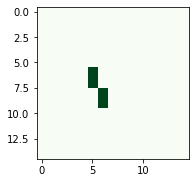

array([[1. , 9. , 6. , 0. , 0. ],
       [0.1, 9. , 6. , 6. , 5. ]])

In [307]:
world_size = 15
empty_template = np.zeros(shape=(world_size,world_size))

creature2 = generate_random_simple_creature()
creature2[0,1] = np.random.randint(2,world_size-2)
creature2[0,2] = np.random.randint(2,world_size-2)

translated_creature = cr.translate_creature_segs_to_world(creature2)

cr.place_creature(empty_template, translated_creature)
ar.render_array(empty_template)

translated_creature

In [308]:
matrix = np.random.randint(-5, 5, (4,4))
matrix

array([[ 2,  2,  4,  2],
       [ 0, -1,  3, -2],
       [ 1,  2, -5,  4],
       [ 2, -3, -1, -3]])

In [309]:

theta = np.pi/2
x = 1
y = 5
cr.rotate_vector(x, y, theta)

(-5.0, 1.0000000000000002)